# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

###Not for Grading


#### Regression using MLP

The objective of this case study is to understand regression i.e., to predict the price of the house using Multilayer perceptron.

## Setup Steps

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "aiml_pg_25" #@param {type:"string"}


In [2]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "4521452411" #@param {type:"string"}


In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "U2W7_CS_MLP_Regression" #name of the notebook
Answer = "Ungraded"
def setup():
#  ipython.magic("sx pip3 install torch")
    from IPython.display import HTML, display
    ipython.magic("sx wget -qq https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Penguin.csv")
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():

    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getComplexity() and getAdditional() and getConcepts() and getComments():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "id" : Id, "file_hash" : file_hash,
              "feedback_experiments_input" : Comments, "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://learn-iiith.talentsprint.com/notebook_submissions")
        # print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()

else:
  print ("Please complete Id and Password cells before running setup")


Setup completed successfully


## Importing required packages

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

The attributes of related House price are stored in "X" as features and the prices of the houses are stored in "y" as labels

In [5]:
X = np.array([[3, 2000, 90], [2, 800, 143], [2, 850, 167], [1, 550, 267], [4, 2000, 396]])
y =  np.array([23.0, 8, 9.0, 9.0 , 25.0])

###Standard scaling the features "X"

In [6]:
ss = StandardScaler()
ss.fit(X)
X = ss.transform(X)
X

array([[ 0.58834841,  1.20863526, -1.13296108],
       [-0.39223227, -0.6997362 , -0.64318182],
       [-0.39223227, -0.62022073, -0.42139498],
       [-1.37281295, -1.09731359,  0.50271682],
       [ 1.56892908,  1.20863526,  1.69482106]])

### MLP Regressor

In [7]:
from sklearn.neural_network import MLPRegressor

In [8]:
# Instantiate Mlp Regressor
clf = MLPRegressor(activation= 'relu', solver= 'sgd',max_iter= 500, hidden_layer_sizes= (4,6,3), learning_rate_init= 0.001, tol= 1e-4, random_state= 123)

In [9]:
# Fit data
clf.fit(X, y)

MLPRegressor(hidden_layer_sizes=(4, 6, 3), max_iter=500, random_state=123,
             solver='sgd')

In [10]:
clf.n_features_in_

3

In [11]:
clf.n_outputs_

1

In [12]:
clf.n_layers_

5

In [13]:
[j.shape for j in clf.coefs_]

[(3, 4), (4, 6), (6, 3), (3, 1)]

###Plotting the Loss vs Epochs graph

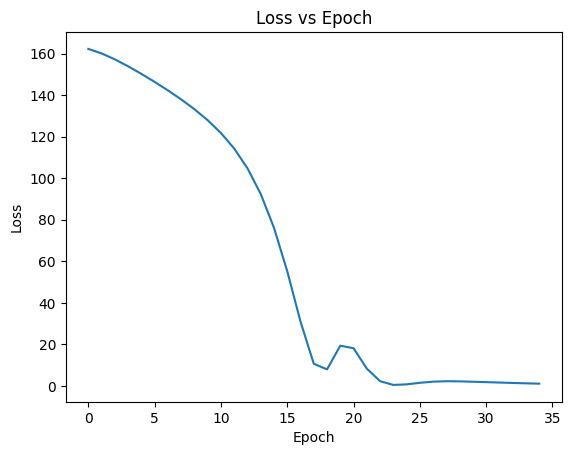

In [14]:
# Plotting Loss vs Epochs
plt.plot(clf.loss_curve_)
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [15]:
pred = clf.predict(X)

In [16]:
import pandas as pd
df = pd.DataFrame({'Actaul': y, 'Predicted': pred})

In [17]:
df

,Actaul,Predicted
0,23.0,24.264736
1,8.0,10.062172
2,9.0,10.062172
3,9.0,10.062172
4,25.0,24.099455


In [18]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, pred)

1.7839021952247254

## Please answer the questions below to complete the experiment:

In [19]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [20]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "sdgfdjhfgjfhjh" #@param {type:"string"}

In [21]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]

In [22]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Somewhat Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [23]:
#@title Run this cell to submit your notebook  { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 3968
Date of submission:  16 Jun 2025
Time of submission:  02:37:16
View your submissions: https://learn-iiith.talentsprint.com/notebook_submissions
